<div style="text-align:center">
  <img src="https://goias.gov.br/imb/wp-content/uploads/sites/29/2021/10/idm2020_2021-fcb.jpg" />
</div>



O Índice de Desempenho dos Municípios – <b>IDM</b> é uma medida sintética de parte do contexto socioeconômico dos municípios em seis áreas de atuação: Economia, Educação, Infraestrutura, Saúde, Segurança e Trabalho. São ao todo 37 variáveis selecionadas para conferir o desempenho dos municípios goianos. O objetivo do índice é facilitar o diagnóstico e a comparação do desempenho dos municípios, bem como avaliar os resultados e subsidiar o planejamento das ações dos governos ao longo do tempo. Houve alteração metodológica na terceira edição do índice (2016), na qual foram acrescentadas três variáveis. A nova metodologia foi replicada para os anos anteriores com o intuito de se manter a série histórica do índice. O IDM tem periodicidade bianual.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
sns.set()

In [4]:
def plot_variancia(sheet: str, features: str, variancia: str, ratio: str):
    fontsize: int = 12
    fig, ax1 = plt.subplots(figsize=(10, 6))
    fig.suptitle(f'Variância da {sheet}', fontsize=20)
    fig.autofmt_xdate()
    
    ax1.set_facecolor('white')
    
    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()
    
    ax1.bar(features, ratio, color='orange')
    # ax1.set_xlabel('Variáveis', fontsize=fontsize)
    ax1.set_ylabel('Variância (%)', fontsize=fontsize)
    ax1.grid(False)
    
    ax2.plot(features, variancia, color='green', lw=4)
    ax2.set_ylabel('Variância', fontsize=fontsize)
    ax2.grid(False)
    # plt.savefig(r'img/variancia_'+sheet+'.png')

In [ ]:
dfIDM = pd.ExcelFile(r'data/tabelas-IDM.xlsx')
countPlot = len(dfIDM.sheet_names)-1
for idx, sheet in enumerate(dfIDM.sheet_names[1:]):
    print(sheet)
    df = dfIDM.parse(sheet)
    df.set_index(df.columns[0], inplace=True)
    X = df.drop(df.columns[[0,1,2]], axis=1)
    Y = df['IDM']
    features = df.columns
    
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)
    
    # print(f'Auto valores: {pca.singular_values_}')
    # print(f'Auto vetores: {pca.components_}')
    # print(f'Variancia explicada: {pca.explained_variance_}')
    # print(f'Variância explicada (ratio): {pca.explained_variance_ratio_}')

    PC1 = pca.fit_transform(X)[:,0]
    PC2 = pca.fit_transform(X)[:,1]

    plot_variancia(sheet, features[3:], pca.explained_variance_, pca.explained_variance_ratio_)    
    
    #Matriz de carga (loadings)
    ldngs = pca.components_[:2]
    
    scalePC1 = 1.0/(PC1.max() - PC1.min())
    scalePC2 = 1.0/(PC2.max() - PC2.min())

    components = pca.fit_transform(X)
    
    colunas: list = []
    for i in range(1,components.shape[1]+1):
        colunas.append('PC'+ str(i))
    
    dfComponets = pd.DataFrame(data=components, columns=colunas)
    
    dfPCA = pd.DataFrame(data=pca.components_.T, columns=colunas, index=X.columns)

    target_groups = np.digitize(Y, np.quantile(Y, [1/3, 2/3]))

    fig, ax = plt.subplots(figsize=(10, 4))
     
    for i, feature in enumerate(features[3:]):
        ax.arrow(0, 0, ldngs[0, i], 
                 ldngs[1, i], 
                 head_width=0.03, 
                 head_length=0.03)
        ax.text(ldngs[0, i] * 1.05, 
                ldngs[1, i] * 1.05, 
                feature, fontsize = 12)
     
    scatter = ax.scatter(PC1 * scalePC1, PC2 * scalePC2, c=target_groups, cmap='viridis')
     
    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_title('Gráfico sobre ' + sheet, fontsize=20)
     
    ax.legend(*scatter.legend_elements(), loc='lower left', title='Grupos')
    plt.savefig(r'img/grafico_'+sheet+'.png')
    # del X, Y, df, dfComponets, dfPCA

# del dfIDM 

In [7]:
dfIDM = pd.ExcelFile(r'data/tabelas-IDM.xlsx')

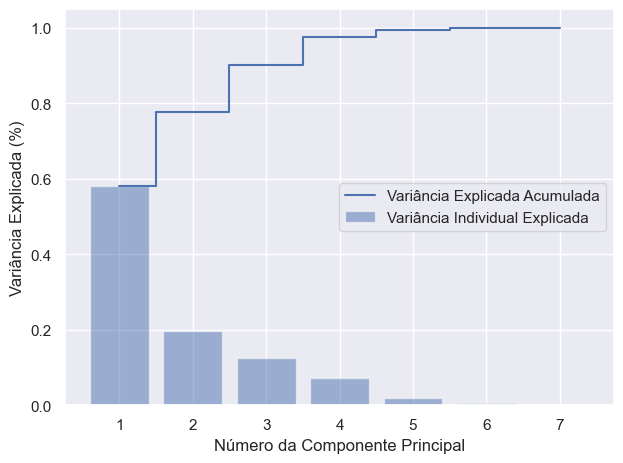

In [111]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Variância Individual Explicada')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Variância Explicada Acumulada')
plt.ylabel('Variância Explicada (%)')
plt.xlabel('Número da Componente Principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

                         PC1       PC2
IDM                 0.933577 -0.228200
IDM_Economia        0.797734 -0.464539
IDM_Trabalho        0.889657 -0.148653
IDM_Educacao        0.631666 -0.290343
IDM_Seguranca      -0.457666 -0.597564
IDM_Infraestrutura  0.974101 -0.114067
IDM_Saude           0.646896  0.554638


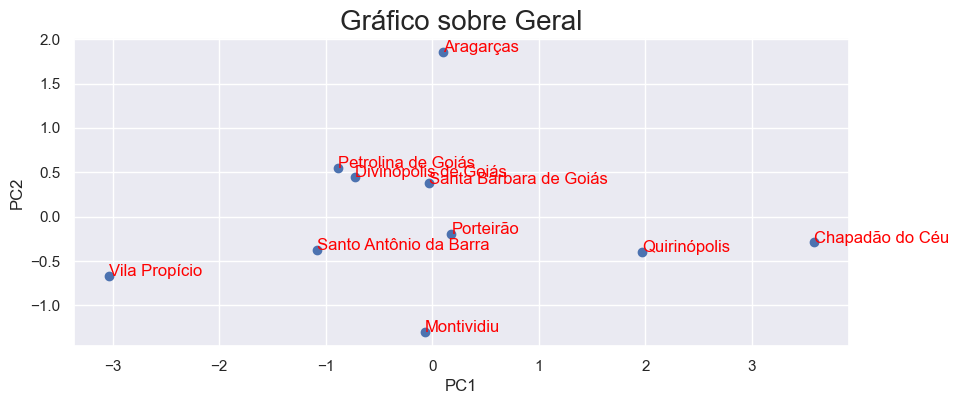

In [19]:
df= dfIDM.parse('Geral')
sheet = 'Geral'
df.set_index(df.columns[0], inplace=True)
df = df.sample(10)
df_temp = df.drop(df.columns[[1]], axis=1)
df = df.iloc[:,2:]

features = df.columns

pca = PCA(n_components=df.shape[1])
pca.fit(df)

# print(f'Auto valores: {pca.singular_values_}')
# print(f'Auto vetores: {pca.components_}')
# print(f'Variancia explicada: {pca.explained_variance_}')
# print(f'Variância explicada (ratio): {pca.explained_variance_ratio_}')

PC1 = pca.fit_transform(df)[:,0]
PC2 = pca.fit_transform(df)[:,1]

dfCorrelacao = df.copy()
dfCorrelacao['PC1'] = PC1
df_temp['PC1'] = PC1
dfCorrelacao['PC2'] = PC2
df_temp['PC2'] = PC2
dfCorrelacao = dfCorrelacao.corr().iloc[0:-2,7:]
print(dfCorrelacao)

# plot_variancia(sheet, features[3:], pca.explained_variance_, pca.explained_variance_ratio_)    
    
#Matriz de carga (loadings)
ldngs = pca.components_[:2]

components = pca.fit_transform(df)

colunas: list = []
for i in range(1,components.shape[1]+1):
    colunas.append('PC'+ str(i))

dfComponets = pd.DataFrame(data=components, columns=colunas)

dfPCA = pd.DataFrame(data=pca.components_.T, columns=colunas, index=df.columns)

# target_groups = np.digitize(Y, np.quantile(Y, [1/3, 2/3]))

fig, ax = plt.subplots(figsize=(10, 4))
 
# for i, feature in enumerate(features[3:]):
#     ax.arrow(0, 0, ldngs[0, i], 
#              ldngs[1, i], 
#              head_width=0.03, 
#              head_length=0.03, color='blue')
#     ax.text(ldngs[0, i] * 1.05, 
#             ldngs[1, i] * 1.05, 
#             feature, fontsize = 12, color='green')
 
scatter = ax.scatter(PC1, PC2)
 
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('Gráfico sobre ' + sheet, fontsize=20)

for idx, row in df_temp.iterrows():
    ax.annotate(row['Municipio'], (row['PC1'], row['PC2']), color='red')

# ax.legend(*scatter.legend_elements(), loc='lower left', title='Grupos')
plt.savefig(r'img/grafico_'+sheet+'.png')

In [15]:
df_temp.sort_values('Municipio')

,Municipio,IDM,IDM_Economia,IDM_Trabalho,IDM_Educacao,IDM_Seguranca,IDM_Infraestrutura,IDM_Saude,PC1,PC2
COD_IBGE,,,,,,,,,,
5203401,Bom Jardim de Goiás,5.07,2.46,3.34,5.83,8.22,2.47,8.07,-0.520285,-0.724690
5204003,Cabeceiras,4.83,2.06,3.36,5.14,7.99,2.32,8.10,-0.694889,-1.110826
5204656,Campinaçu,5.45,2.13,4.54,5.08,8.94,2.28,9.73,-2.386555,-0.656428
5205703,Córrego do Ouro,5.53,2.31,2.51,6.13,9.22,3.20,9.81,-1.826712,1.239378
5208103,Formoso,4.95,2.10,2.62,5.24,8.38,3.03,8.35,-0.648403,-0.056842
5212808,Mara Rosa,5.30,2.07,3.02,6.43,8.30,4.31,7.68,0.687209,0.795529
5217401,Pires do Rio,5.04,2.90,2.96,6.09,7.26,4.28,6.74,1.831737,0.008356
5218300,Posse,5.16,2.26,3.38,6.10,8.63,3.18,7.41,0.186761,-0.297876
5219001,Sanclerlândia,5.45,2.29,2.97,5.89,8.26,5.06,8.25,0.546572,1.432858


Geral


C:\Users\wesley.modanez\AppData\Local\Temp\ipykernel_18936\2723951442.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(PC1, PC2, cmap='viridis')


Economia


C:\Users\wesley.modanez\AppData\Local\Temp\ipykernel_18936\2723951442.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(PC1, PC2, cmap='viridis')


Educacao


C:\Users\wesley.modanez\AppData\Local\Temp\ipykernel_18936\2723951442.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(PC1, PC2, cmap='viridis')
C:\Users\wesley.modanez\AppData\Local\Temp\ipykernel_18936\2723951442.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(PC1, PC2, cmap='viridis')


Infraestrutura
Saude


C:\Users\wesley.modanez\AppData\Local\Temp\ipykernel_18936\2723951442.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(PC1, PC2, cmap='viridis')


Seguranca


C:\Users\wesley.modanez\AppData\Local\Temp\ipykernel_18936\2723951442.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(PC1, PC2, cmap='viridis')


Trabalho


C:\Users\wesley.modanez\AppData\Local\Temp\ipykernel_18936\2723951442.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(PC1, PC2, cmap='viridis')


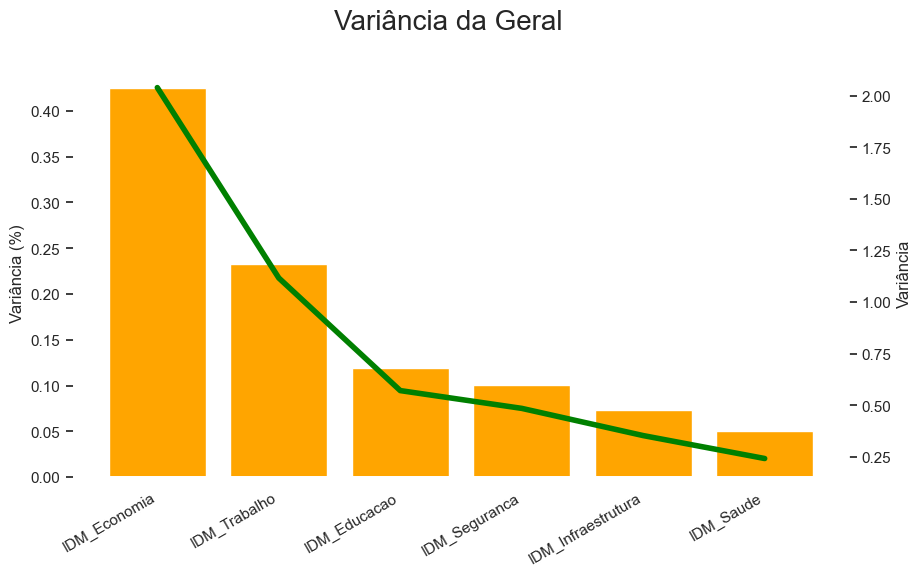

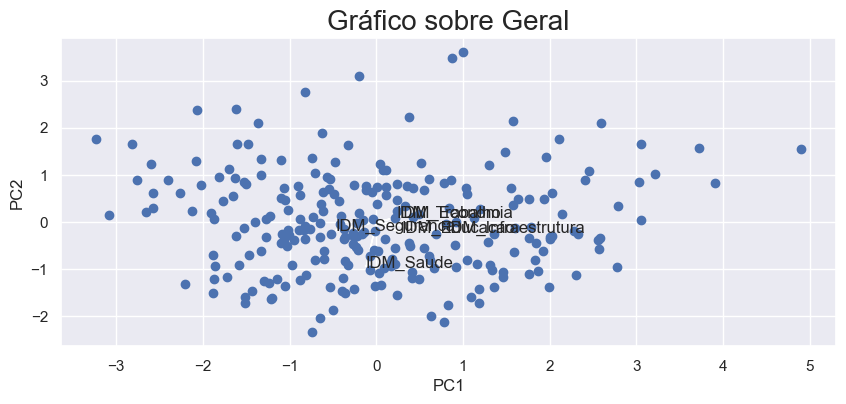

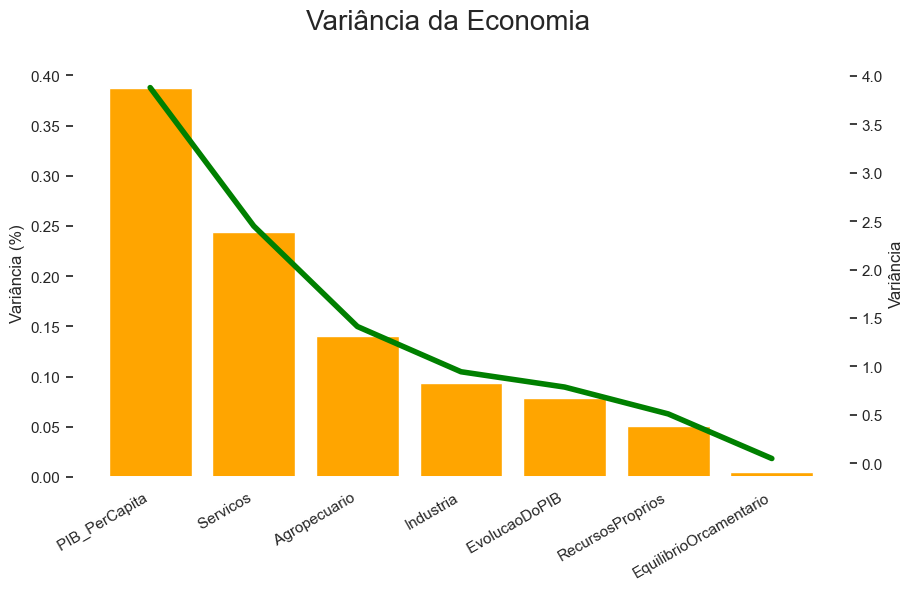

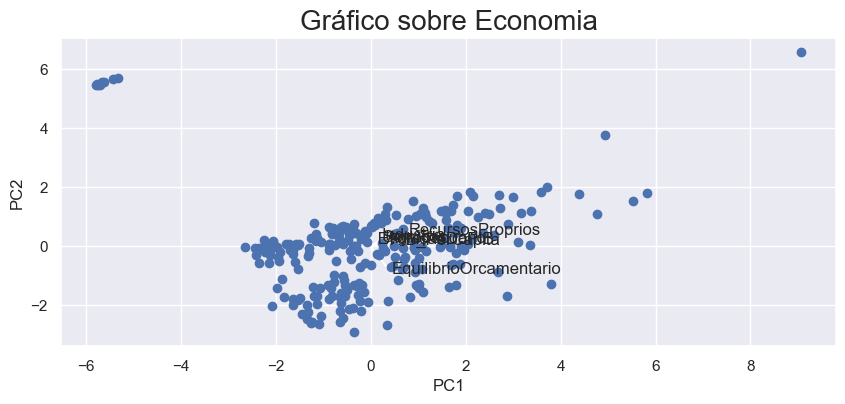

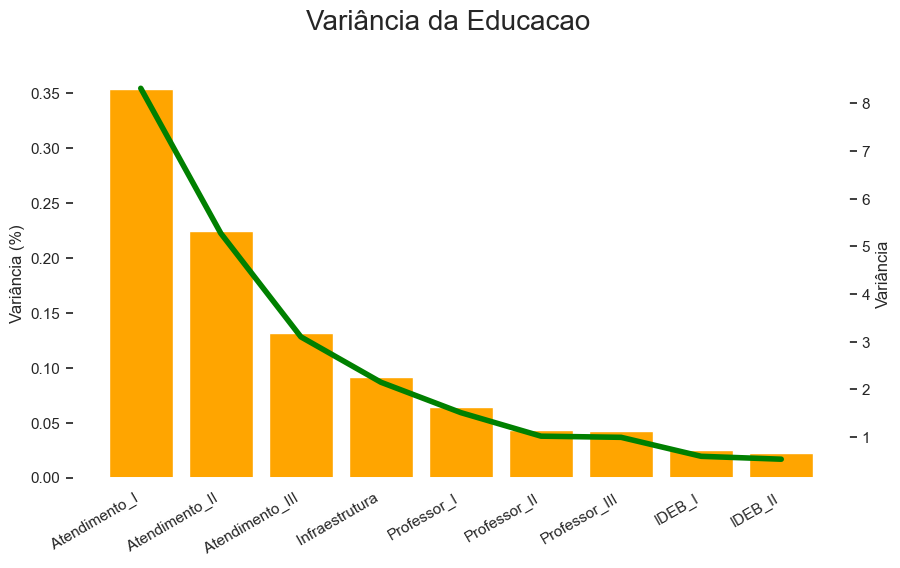

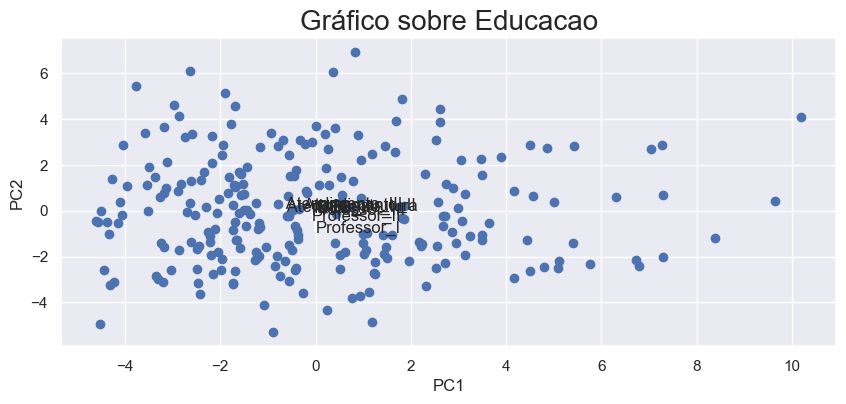

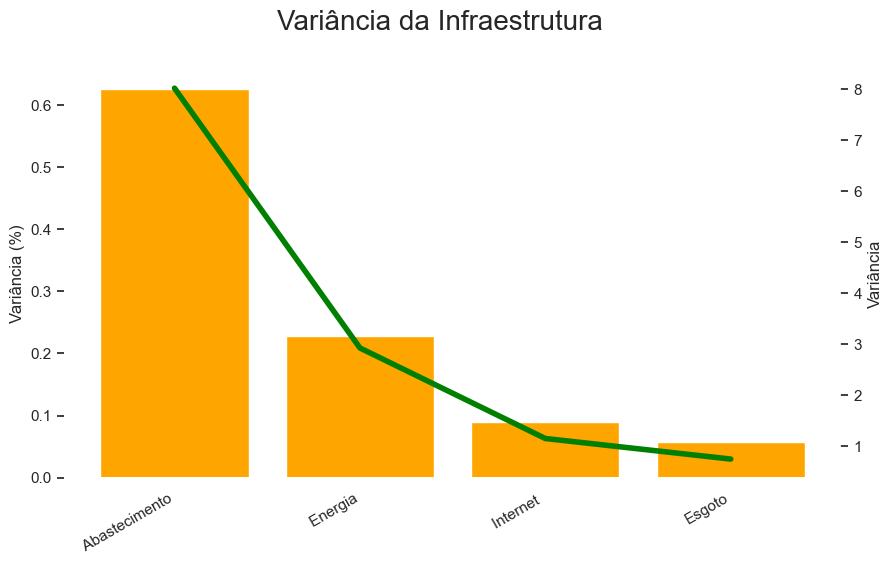

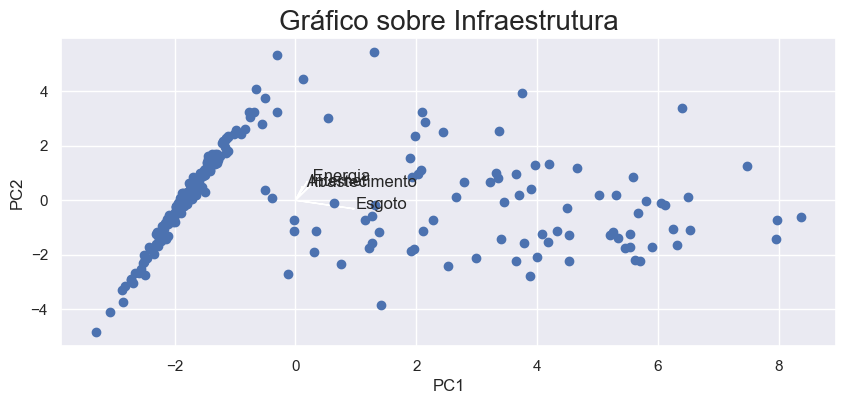

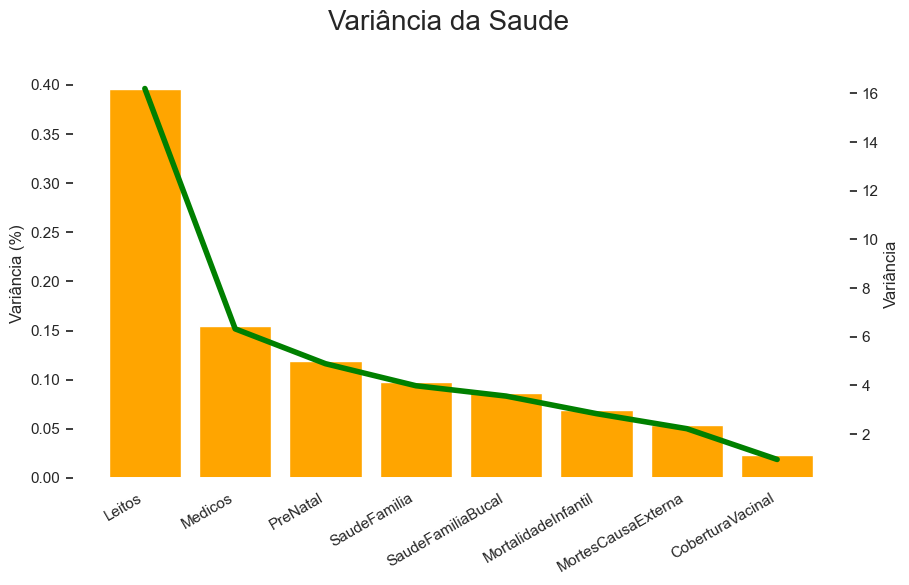

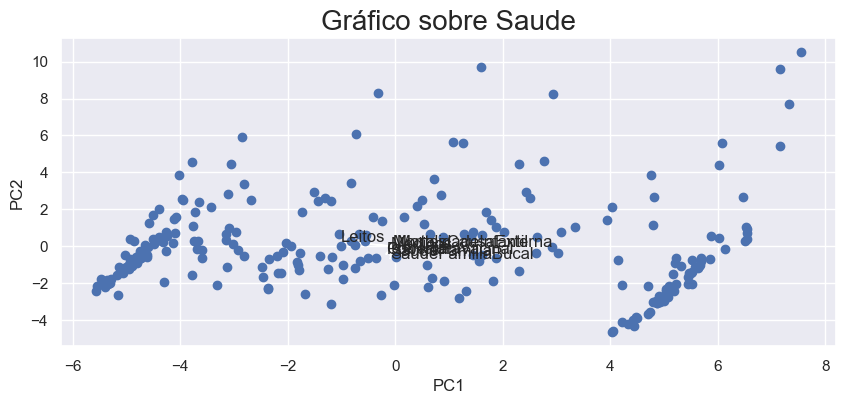

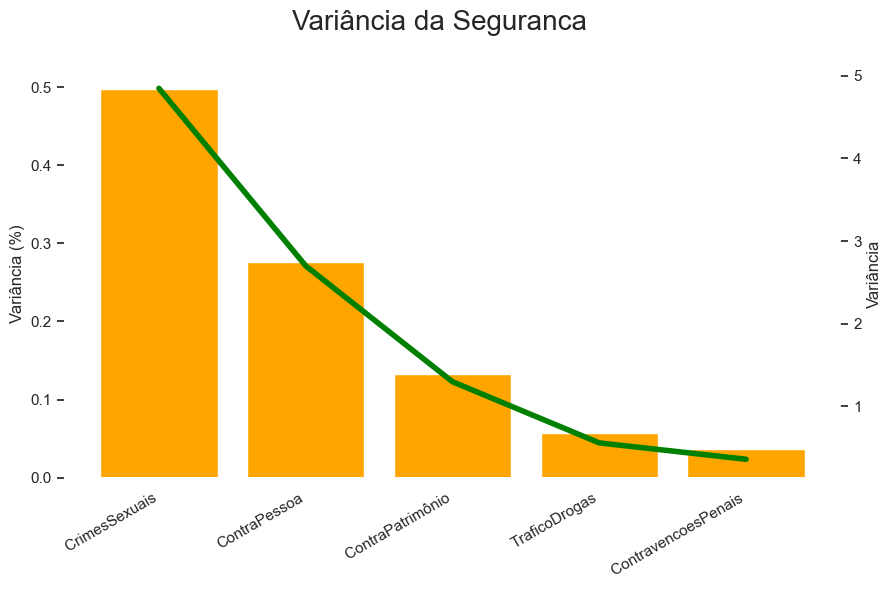

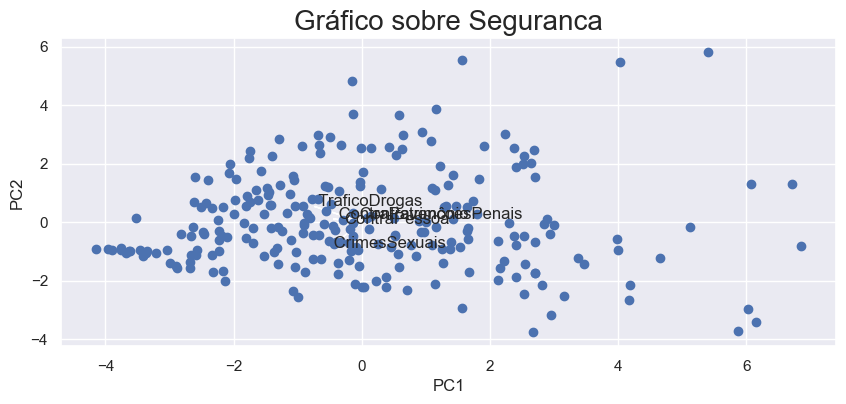

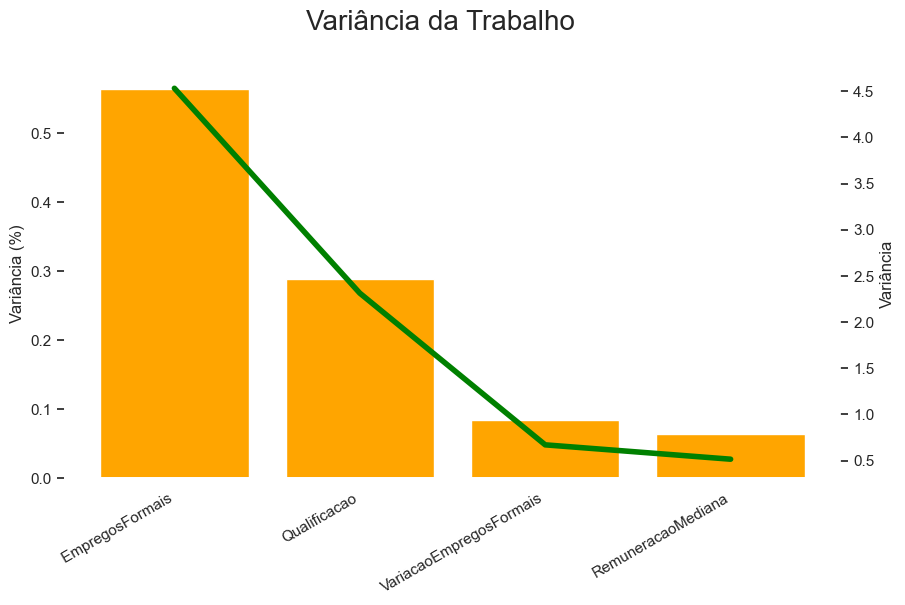

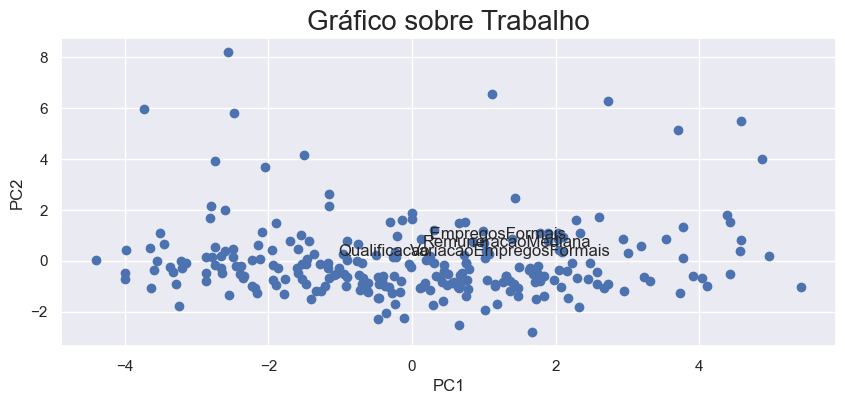

In [5]:
dfIDM = pd.ExcelFile(r'data/tabelas-IDM.xlsx')
countPlot = len(dfIDM.sheet_names)-1
for idx, sheet in enumerate(dfIDM.sheet_names[1:]):
    print(sheet)
    df = dfIDM.parse(sheet)
    df.set_index(df.columns[0], inplace=True)
    X = df.drop(df.columns[[0,1,2]], axis=1)
    Y = df['IDM']
    features = df.columns
    
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)
    
    # print(f'Auto valores: {pca.singular_values_}')
    # print(f'Auto vetores: {pca.components_}')
    # print(f'Variancia explicada: {pca.explained_variance_}')
    # print(f'Variância explicada (ratio): {pca.explained_variance_ratio_}')

    PC1 = pca.fit_transform(X)[:,0]
    PC2 = pca.fit_transform(X)[:,1]

    plot_variancia(sheet, features[3:], pca.explained_variance_, pca.explained_variance_ratio_)    
    
    #Matriz de carga (loadings)
    ldngs = pca.components_[:2]
    
    scalePC1 = 1.0/(PC1.max() - PC1.min())
    scalePC2 = 1.0/(PC2.max() - PC2.min())

    components = pca.fit_transform(X)
    
    colunas: list = []
    for i in range(1,components.shape[1]+1):
        colunas.append('PC'+ str(i))
    
    dfComponets = pd.DataFrame(data=components, columns=colunas)
    
    dfPCA = pd.DataFrame(data=pca.components_.T, columns=colunas, index=X.columns)

    target_groups = np.digitize(Y, np.quantile(Y, [1/3, 2/3]))

    fig, ax = plt.subplots(figsize=(10, 4))
     
    for i, feature in enumerate(features[3:]):
        ax.arrow(0, 0, ldngs[0, i], 
                 ldngs[1, i], 
                 head_width=0.03, 
                 head_length=0.03)
        ax.text(ldngs[0, i] * 1.05, 
                ldngs[1, i] * 1.05, 
                feature, fontsize = 12)
     
    # scatter = ax.scatter(PC1 * scalePC1, PC2 * scalePC2, c=target_groups, cmap='viridis')
    scatter = ax.scatter(PC1, PC2, cmap='viridis')
     
    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_title('Gráfico sobre ' + sheet, fontsize=20)
     
    # ax.legend(*scatter.legend_elements(), loc='lower left', title='Grupos')
    plt.savefig(r'img/grafico_'+sheet+'.png')
    del X, Y, df, dfComponets, dfPCA

del dfIDM 